# **Digits Classification**

## We will code to implement this image! 

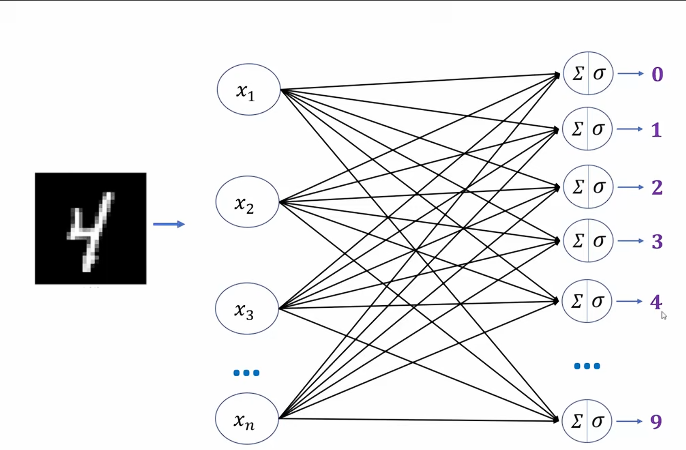

In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

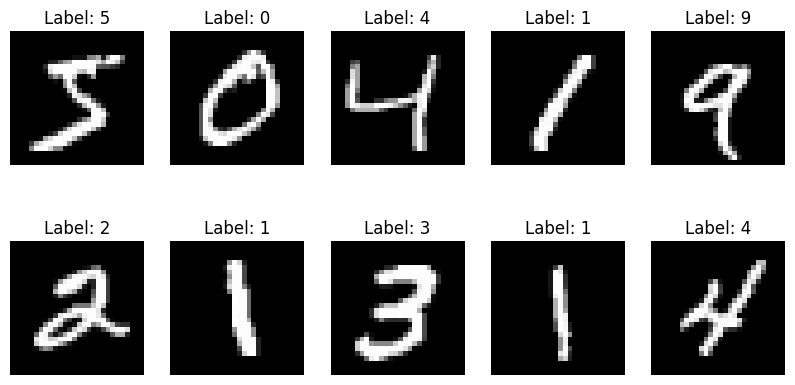

In [6]:
# visualize some digits
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [7]:
# flatten the images
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32') / 255.0

In [8]:
x_train.shape

(60000, 784)

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\programs\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###  Model Summary
This model is a simple feed-forward neural network built using Keras Sequential API.

- **Dense(128, ReLU):** Learns general features from the flattened image.
- **Dense(64, ReLU):** Learns deeper and more abstract patterns.
- **Dense(10, Softmax):** Produces probabilities for 10 classes (digits 0–9).
- **Input shape:** 28×28 image flattened into 784 inputs.

Softmax ensures the outputs sum to 1, representing class probabilities.

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

###  Why compile?
`model.compile()` prepares the network for training by defining:

- **Optimizer (Adam):** Controls how weights are updated during training.
- **Loss function (Sparse Categorical Crossentropy):** Measures prediction error for multi-class classification when labels are integers.
- **Metric (Accuracy):** Tracks how often predictions are correct.

Without compile(), the model cannot train.

In [11]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9204 - loss: 0.2710 - val_accuracy: 0.9630 - val_loss: 0.1284
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9661 - loss: 0.1103 - val_accuracy: 0.9632 - val_loss: 0.1229
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9770 - loss: 0.0742 - val_accuracy: 0.9724 - val_loss: 0.0978
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9815 - loss: 0.0563 - val_accuracy: 0.9714 - val_loss: 0.0992
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9859 - loss: 0.0434 - val_accuracy: 0.9741 - val_loss: 0.0943


###  Training Explanation (model.fit)
`model.fit()` begins the actual learning process.

- **epochs=5:** The model goes through the full training dataset 5 times.
- **batch_size=32:** Data is fed to the network in groups of 32 samples.
- **validation_split=0.2:** 20% of the training data is used for validation to monitor generalization.

Training helps the model learn patterns; validation helps detect overfitting.

In [12]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0800


[0.0800081416964531, 0.9772999882698059]

###  Why evaluate?
`model.evaluate()` measures the model’s performance on unseen data (test set).

This tells us:
- How well the model generalizes.
- Whether it is overfitting.
- The real expected accuracy in real-world usage.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


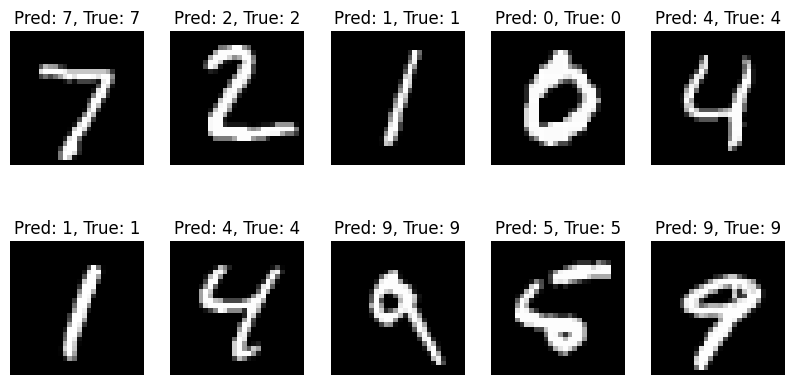

In [13]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    pred = np.argmax(model.predict(x_test[i].reshape(1, 28*28)), axis=1)[0]
    plt.title(f"Pred: {pred}, True: {y_test[i]}")
    plt.axis('off')

###  Why use argmax?
`model.predict()` outputs **probabilities** for each class, not class labels.

Example: [0.01, 0.03, 0.10, 0.80, ...]
- The highest probability = predicted class.

`np.argmax(..., axis=1)`:
- Finds the index of the maximum probability.
- Converts probabilities → class numbers (0–9).

This is required for the confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


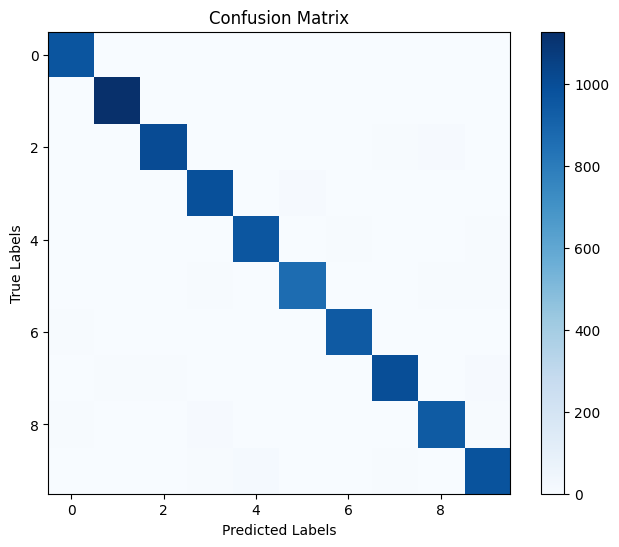

In [15]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix Notes
A confusion matrix compares:

- **True labels** (actual values)
- **Predicted labels** (model outputs)

Rows = True labels  
Columns = Predicted labels  

It helps identify:
- Which classes the model predicts correctly.
- Which classes it confuses.
- The types of errors the model makes.

Useful for improving the model.

# This is the first notebook and what i have learned from the course! 